<img
    src="https://upload.wikimedia.org/wikipedia/commons/4/42/CNAM_Logo.svg" 
    alt=""
    height="200px" 
    width="200px"
    align=left
/> 


<center> <br>
  <h1 style="color:#7c7979";>Incrustation et display d'un son à l'intérieur d'un carnet Jupyter</h1>
</center>

<center>
  <h2 style="color:#000000";>Exemple d'application : transformée de Fourier à partir d'un fichier son</h2>
</center>

## 1) Display d'un fichier son local

Ci-dessous le display d'un son de clavier d'ordinateur provenant d'un fichier local.

In [1]:
from IPython.display import Audio

audio = Audio(filename='./son_clavier_ordinateur.wav')
display(audio)

## 2) Tracé du signal associé et de son spectre complet obtenu par FFT

Frequency sampling = 44100
Channels :  1
Complete Samplings N = 1327169
secs : 30.09453514739229
Timestep between samples Ts = 2.2675736961451248e-05


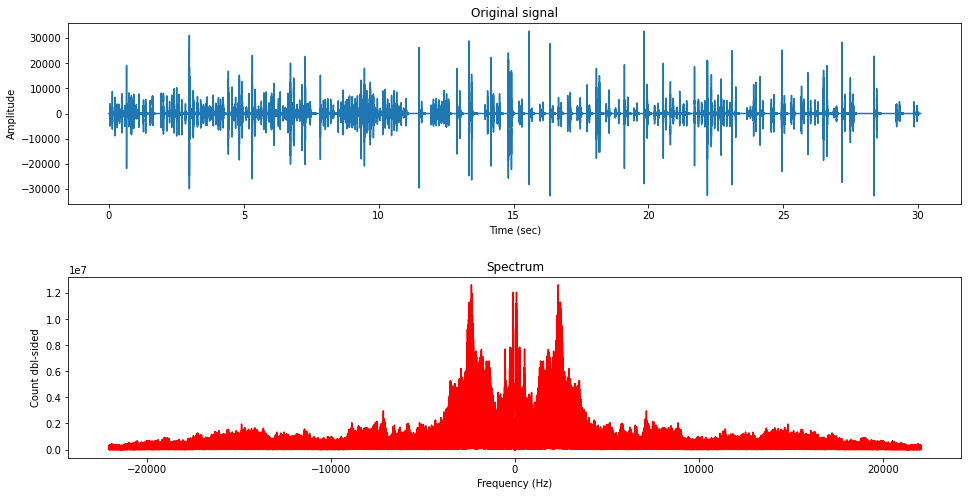

In [38]:
from __future__ import print_function
import scipy.io.wavfile as wavfile
import scipy
import scipy.fftpack
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Calcul de la transformée de Fourier rapide du signal
fs_rate, signal = wavfile.read('./son_clavier_ordinateur.wav')
print ("Frequency sampling =", fs_rate)
l_audio = len(signal.shape)
print ("Channels : ", l_audio)
if l_audio == 2:
    signal = signal.sum(axis=1) / 2
N = signal.shape[0]
print ("Complete Samplings N =", N)
secs = N / float(fs_rate)
print ("secs :", secs)
Ts = 1.0/fs_rate 
print ("Timestep between samples Ts =", Ts)
t = np.arange(0, secs, Ts)
FFT = abs(scipy.fft.fft(signal))
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])
fft_freqs = np.array(freqs)

# Tracé du signal et de son spectre
fig=plt.figure(figsize=(16,8))
fig.subplots_adjust(hspace=0.4)
fig.add_subplot(211)
p1 = plt.plot(t, signal)
plt.title('Original signal')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
fig.add_subplot(212)
p2 = plt.plot(freqs, FFT,'r')
plt.title('Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count dbl-sided')
plt.show()